**CS306: DATA ANALYSIS AND VISUALIZATION**
---

LAB 4: Airline Data (Big) Regression Analysis


STUDENT ID: 201801407

NAME: PRATVI SHAH

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
from scipy import stats
import math
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from scipy.stats import norm
from scipy.stats import iqr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('2008.csv.bz2')

In [3]:
data=df[['AirTime','Distance']]


### Removing null values

In [4]:
data=data.dropna()

for i in data.columns:
    data=data[data['{}'.format(i)].notnull()]
row_count=data.shape[0]
print(data.head())

   AirTime  Distance
0    116.0       810
1    113.0       810
2     76.0       515
3     78.0       515
4     77.0       515


### Taking Distance as X and Airtime as Y

In [5]:
X=data['Distance']
Y=data['AirTime']


## Q1

**Pearson Correlation Coefficient**

In [6]:
def pearson_coeff(x,y):
    N=(np.mean(x*y) - np.mean(x)*np.mean(y))
    D1=np.sqrt(np.mean(x*x) - np.mean(x)*np.mean(x))
    D2=np.sqrt(np.mean(y*y) - np.mean(y)*np.mean(y))
    D=D1*D2
    r=N/D
    return r;

In [7]:
pearson_corr_coeff=pearson_coeff(np.array(X),np.array(Y))
print('Calculated Pearson Correlation coefficient: ',pearson_corr_coeff)
r=stats.pearsonr(X,Y)
print('Inbuilt: ',r[0])

Calculated Pearson Correlation coefficient:  0.9828758232165179
Inbuilt:  0.9828758232165182


**Finding intercept c=($\beta 1$) and slope m=($\beta 2$)**

In [8]:
def get_constants(x,y):
    m = (np.mean(x) * np.mean(y) - np.mean(x*y) ) / (np.mean(x) * np.mean(x) - np.mean(x*x))
    b = np.mean(y) - (np.mean(x) * m)
    return b,m

In [9]:
x=np.array(X).reshape([-1,1]).transpose()[0]
y=np.array(Y)
c,m=get_constants(x,y)
print('Intercept of regression line: ',c)
print('Slope of regression line: ',m)
ypred= m*x + c


Intercept of regression line:  18.257032395292754
Slope of regression line:  0.1176840924861962


**Calculating RMSE of y and y_predicted**

In [10]:
rmse= np.sqrt(mean_squared_error(y, ypred))
print('RMSE :', rmse)

RMSE : 12.427072327524876


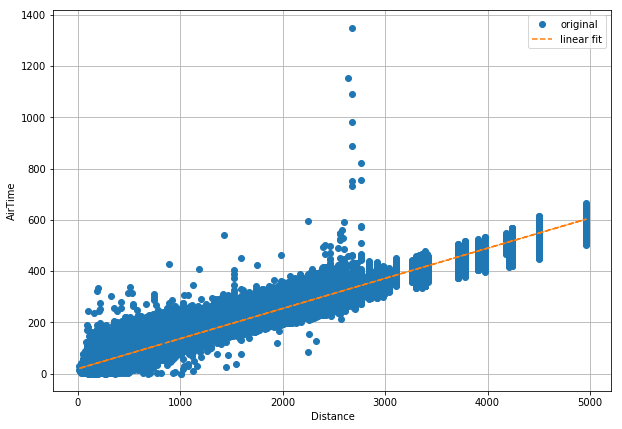

In [11]:
#initial predicted fit
plt.figure(figsize=[10,7])
plt.plot(x,y,'o',label='original')
plt.plot(x,ypred,'--',label='linear fit')
plt.xlabel('Distance')
plt.ylabel('AirTime')
plt.grid(True)
plt.legend()
plt.show()


## Q2

### 95% confidence interval for slope

In [12]:
sx=np.sqrt(np.sum((x-np.mean(x))**2))
l_interval=m - 1.96*np.std(y)/sx
r_interval=m + 1.96*np.std(y)/sx
print('95% confidence interval for slope: ['+str(l_interval)+','+str(r_interval)+']')
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(X),np.array(Y))
l_interval=m - 1.96*std_err
r_interval=m + 1.96*std_err
print('\nUsing inbuilt function 95% confidence interval for slope: ['+str(l_interval)+','+str(r_interval)+']')



95% confidence interval for slope: [0.11759445894938748,0.11777372602300491]

Using inbuilt function 95% confidence interval for slope: [0.11766757578900007,0.11770060918339233]


### Mean of y$_0$ when x$_0$=1200 

In [13]:
Xo=1200
yl=l_interval*Xo + c
yr=r_interval*Xo + c
n = len(x)
print('Mean of y0 calculated using the confidence interval obtained previously : ',(yl+yr)/2)

s = np.sqrt(np.sum((y - ypred)**2)/(n - 2))
k = np.sqrt((1/n) + (Xo - np.mean(x))/(np.sum((x - np.mean(x))**2)))
y0=m*Xo + c
y_l=y0-1.96*s*k
y_r=y0+1.96*s*k
print('\n95% confidence interval of y: ['+str(y_l)+','+str(y_r)+']')
print('\nMean of y0 calculated using the confidence interval of 95% on y : ',(y_l+y_r)/2)

Mean of y0 calculated using the confidence interval obtained previously :  159.47794337872818

95% confidence interval of y: [159.46863352970556,159.4872532277508]

Mean of y0 calculated using the confidence interval of 95% on y :  159.47794337872818


## Q3

In [34]:
def run_wls(x,y,ypred,lim,R,m):
    err=1
    runs=0
    while (err>lim and runs<R):
        d=y-ypred
        ui=d/(np.std(d)*3)
        w=np.zeros(len(y))
        for i in range(len(ui)):
            if ui[i]<1:
                w[i]=(1-ui[i]*ui[i])**2
            else:
                w[i]=0
        x_wls=[]
        y_wls=[]
        for i in range(len(x)):
            x_wls.append(x[i]*np.sqrt(w[i]))
            y_wls.append(y[i]*np.sqrt(w[i]))
        x_wls=np.array(x_wls).reshape([-1,1])
        y_wls=np.array(y_wls)
        WLS = LinearRegression()
        WLS.fit(x_wls, y_wls)
        err=np.abs(m-WLS.coef_)
        m=WLS.coef_
        c=WLS.intercept_
        print(m,c)
        ypred=m*x + c
        runs+=1
    return WLS.intercept_,WLS.coef_,x_wls,y_wls


In [35]:
c_wls,m_wls,x_wls,y_wls=run_wls(x,y,ypred,0.00001,50,m)

[0.11553693] 17.03361055397241
[0.11438619] 17.116201851378577
[0.11380834] 17.251291602580196
[0.11352561] 17.335805629969784
[0.11338977] 17.380326117111935
[0.113325] 17.402484976734954
[0.11329424] 17.41323691893804
[0.1132797] 17.41835482210881
[0.11327286] 17.420773526804055


### **WLS intercept and slope**

In [36]:
print('WLS intercept: ',c_wls)
print('WLS slope: ', m_wls)

WLS intercept:  17.420773526804055
WLS slope:  [0.11327286]


### RMSE using new values

In [37]:
ypred2=m_wls + x_wls*c_wls
rmse2=np.sqrt(mean_squared_error(y_wls, ypred2))
print('\nRMSE with weighted data:', rmse2)
ypred3=m_wls + x*c_wls
rmse3=np.sqrt(mean_squared_error(y, ypred3))
print('\nRMSE with original data:', rmse3)

NameError: name 'x_wls' is not defined

### Comparing OLS fit with WLS fit

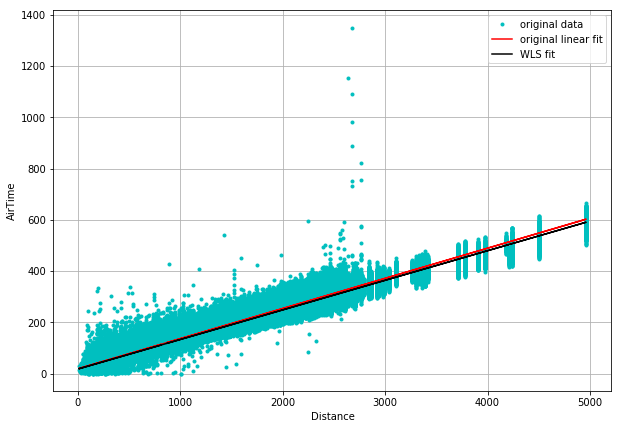

In [27]:
#wls predicted fit
ypred_wls=WLS.intercept_ + x*WLS.coef_
plt.figure(figsize=[10,7])
plt.plot(x,y,'c.',label='original data')
plt.plot(x,ypred,'r-',label='original linear fit')
plt.plot(x,ypred_wls,'k-',label='WLS fit')
plt.xlabel('Distance')
plt.ylabel('AirTime')
plt.grid(True)
plt.legend()
plt.show()


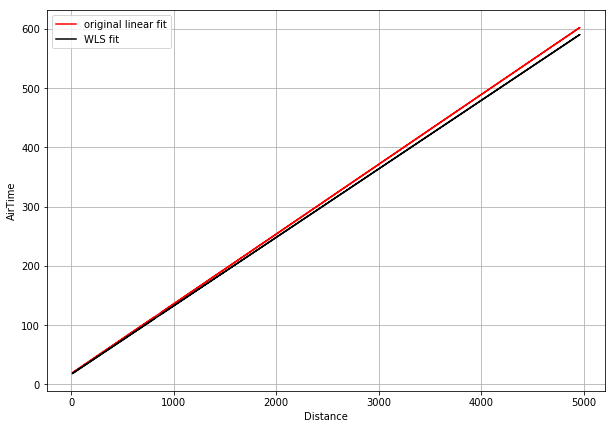

In [28]:
plt.figure(figsize=[10,7])
plt.plot(x,ypred,'r-',label='original linear fit')
plt.plot(x,ypred_wls,'k-',label='WLS fit')
plt.xlabel('Distance')
plt.ylabel('AirTime')
plt.grid(True)
plt.legend()
plt.show()

We could clearly observe from the above methods that WLS gives better fit for the weighted attributes and not the original values.

RMSE of weighted data with WLS fit: 8.997451263742029

RMSE of original data with WLS fit: 12.793300780453471

The fit obtained in Q1 is the best fit with all the outliers while the effect of outliers is nullified in the WLS method. This nullifying effect is what the weighted attributes represent. 

We can also verify that any WLS fit other than the one obtained in Q1 will give worse fit to the original data as the Q1 fit has slope and intercept values which were obtained by minimizing the MSE of the predicted linear fit and the original data.

**From this we can conclude that WLS gives us a better fit for data in which outliers beyond 3$\sigma$ are removed. 
In WLS even when the outliers were present in the data they did not contribute to the fit suggesting the robustness of the WLS model.**
